In [198]:
#import required packages
import pandas as pd
import numpy as np
import datetime
import itertools
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from matplotlib.pylab import rcParams
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from pmdarima import auto_arima
from pmdarima import ARIMA
import pmdarima
%matplotlib inline
rcParams['figure.figsize'] = 20,10
scaler = MinMaxScaler(feature_range=(0, 1))

# Import and analyze data

In [114]:
#Import data 

df = pd.read_csv('/Users/poornima/Public/project_data.csv')
df = df.drop(["COVID_NewCases", "COVID_Deaths"], axis=1)
df.rename(columns = {'NIFTY_Close':'Nifty_Close'}, inplace = True)
df.rename(columns = {'BSE_Close':'Sensex_Close'}, inplace = True)
print (df.head())
df.info()

         Date  Nifty_Close  Sensex_Close
0  2020-01-01  12182.50000      41306.02
1  2020-01-02  12282.20020      41626.64
2  2020-01-03  12226.65039      41464.61
3  2020-01-06  11993.04981      40676.63
4  2020-01-07  12052.95020      40869.47
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          499 non-null    object 
 1   Nifty_Close   499 non-null    float64
 2   Sensex_Close  499 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.8+ KB


In [125]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date); df.index = df['Date']
df.index=df.index.to_julian_date()
df.isnull().sum()
df.isna().any()
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 499 entries, 2458849.5 to 2459579.5
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          499 non-null    datetime64[ns]
 1   Nifty_Close   499 non-null    float64       
 2   Sensex_Close  499 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 15.6 KB
None


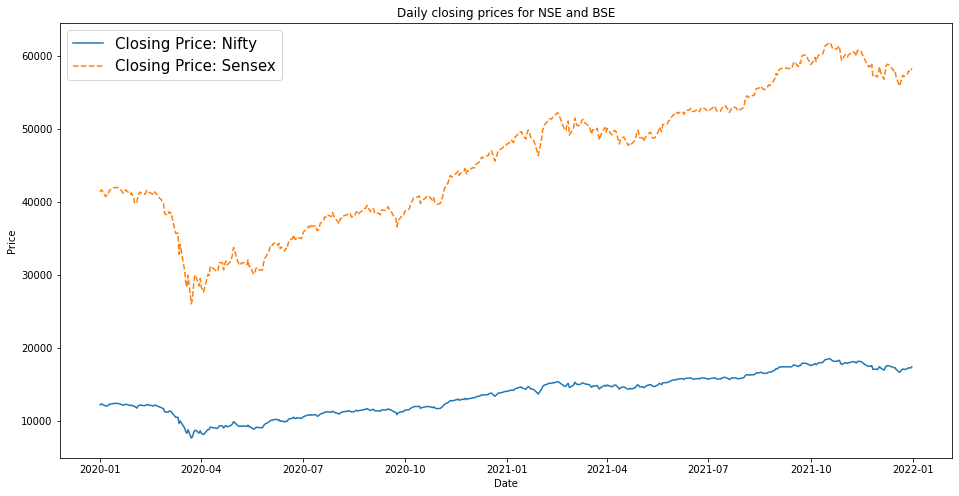

In [126]:
# Reset index column so that we have integers to represent time for later analysis
#df=df.reset_index()
#plot NIFTY and Sensex closing prices 
plt.figure(figsize=(16,8))
plt.title('Daily closing prices for NSE and BSE')
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(df['Date'],df['Nifty_Close'], label='Closing Price: Nifty')
plt.plot(df['Date'],df['Sensex_Close'], label='Closing Price: Sensex', linestyle = 'dashed')
plt.legend(loc=2, prop={'size': 15} )
plt.show()

#Create train test dataset

In [127]:
#Import package for splitting data set
from sklearn.model_selection import train_test_split

# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

x_train = np.array(train.index).reshape(-1, 1)
x_test = np.array(test.index).reshape(-1, 1)
#x_train = train.drop(['NIFTY_Close','BSE_Close','COVID_NewCases','COVID_Deaths'], axis = 1)

y_train_NIFTY = train['Nifty_Close']
y_train_BSE = train['Sensex_Close']
#x_test = test.drop(['NIFTY_Close','BSE_Close','COVID_NewCases','COVID_Deaths'], axis = 1)

y_test_NIFTY = test['Nifty_Close']
y_test_BSE = test['Sensex_Close']

# Linear Regression Model

NIFTY

In [132]:
#Create and train the model
from sklearn.linear_model import LinearRegression

# Create LinearRegression Object 
model_NIFTY = LinearRegression()

# Fit linear model using the train data set for NIFTY
model_NIFTY.fit(x_train, y_train_NIFTY)

# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model_NIFTY.coef_)))
# The Intercept
print('Intercept: ', model_NIFTY.intercept_)

#validating model
y_pred_NIFTY = model_NIFTY.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_NIFTY, y_pred_NIFTY))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_NIFTY, y_pred_NIFTY))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_NIFTY, y_pred_NIFTY)))
print('R2: ', metrics.r2_score(y_test_NIFTY, y_pred_NIFTY))




Slope:  12.268740478809098
Intercept:  -30157912.214392267
Mean Absolute Error: 848.7480712005801
Mean Squared Error: 1263547.2549502263
Root Mean Squared Error: 1124.0761784462059
R2:  0.8259035546129759


/var/folders/6y/lwqvp01s4nz4xzk_rx37tjsh0000gn/T/ipykernel_4771/725604942.py:11: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Slope: ', np.asscalar(np.squeeze(model_NIFTY.coef_)))


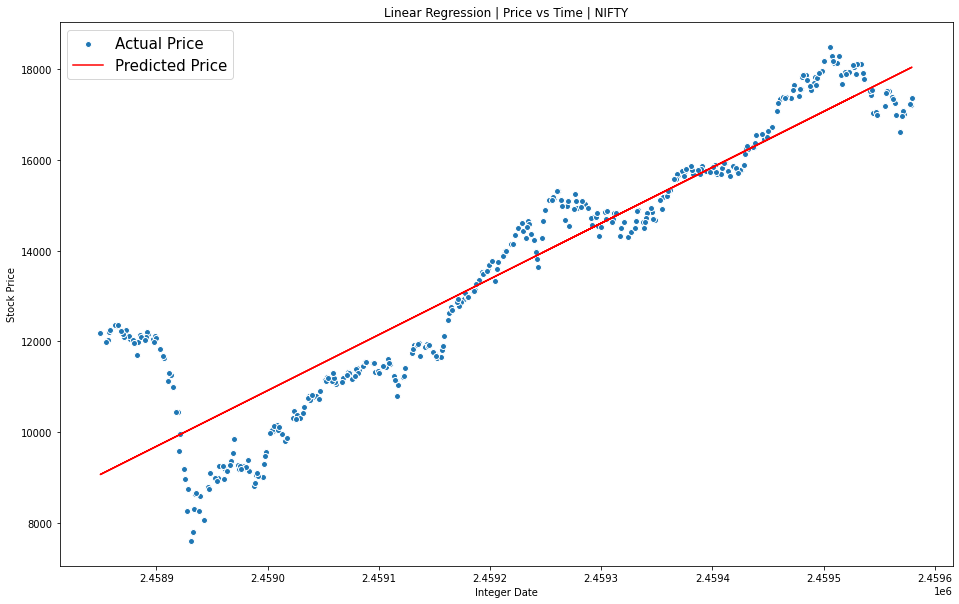

In [133]:
#rms=np.sqrt(np.mean(np.power((np.array(y_test_NIFTY)-np.array(y_pred_NIFTY)),2)))
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time | NIFTY')
plt.scatter(x_train, y_train_NIFTY, edgecolor='w', label='Actual Price')
plt.plot(x_train, model_NIFTY.predict(x_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend(loc=2, prop={'size': 15} )
plt.show()


BSE

In [134]:
##**BSE**##
# Create LinearRegression Object
model_BSE = LinearRegression()

# Fit linear model using the train data set for BSE
model_BSE.fit(x_train, y_train_BSE)
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model_BSE.coef_)))
# The Intercept
print('Intercept: ', model_BSE.intercept_)

y_pred_BSE = model_BSE.predict(x_test)
#rms=np.sqrt(np.mean(np.power((np.array(y_test_BSE)-np.array(y_pred_BSE)),2)))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_BSE, y_pred_BSE))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_BSE, y_pred_BSE))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_BSE, y_pred_BSE)))
print('R2: ', metrics.r2_score(y_test_BSE, y_pred_BSE))

Slope:  40.00209836437474
Intercept:  -98328000.89886256
Mean Absolute Error: 2908.0870679852837
Mean Squared Error: 14304090.679091208
Root Mean Squared Error: 3782.0749171706275
R2:  0.8165912970185999


/var/folders/6y/lwqvp01s4nz4xzk_rx37tjsh0000gn/T/ipykernel_4771/1083044146.py:8: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Slope: ', np.asscalar(np.squeeze(model_BSE.coef_)))


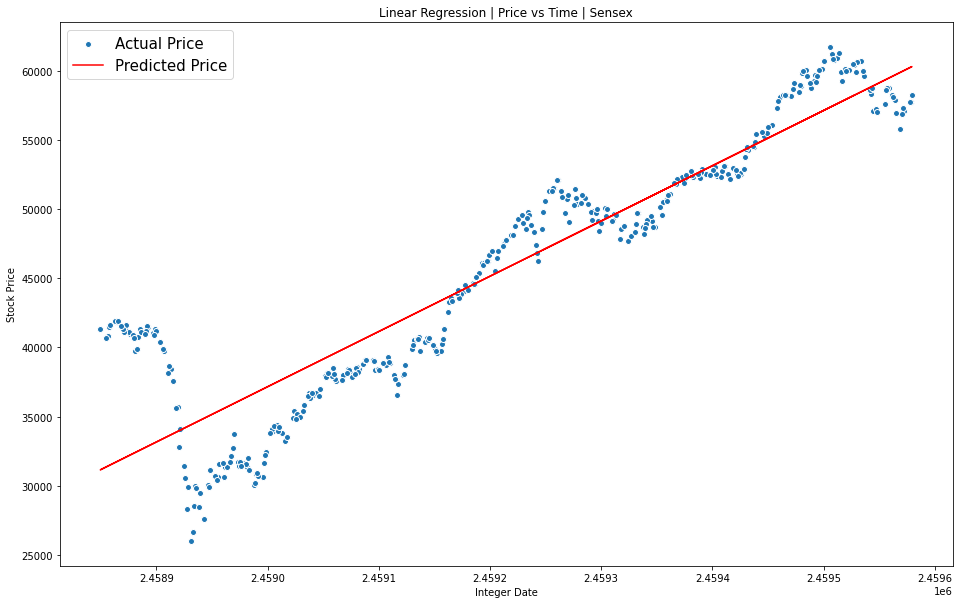

In [135]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time | Sensex')
plt.scatter(x_train, y_train_BSE, edgecolor='w', label='Actual Price')
plt.plot(x_train, model_BSE.predict(x_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend(loc=2, prop={'size': 15} )
plt.show()

# K-nearestneighbour

In [170]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

train = train.sort_index(ascending=True, axis =0)
test = test.sort_index(ascending=True, axis =0)
x_train = np.array(train.index).reshape(-1, 1)
x_test = np.array(test.index).reshape(-1, 1)

y_train_NIFTY = train['Nifty_Close']
y_train_BSE = train['Sensex_Close']
y_test_NIFTY = test['Nifty_Close']
y_test_BSE = test['Sensex_Close']

x_train_scaled = scaler.fit_transform(x_train)
x_train_K = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test_K = pd.DataFrame(x_test_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#Validating model
model.fit(x_train_K,y_train_NIFTY)
y_pred_NIFTY= model.predict(x_test_K)

test['Predictions'] = 0
test['Predictions'] = y_pred_NIFTY

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_NIFTY, y_pred_NIFTY))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_NIFTY, y_pred_NIFTY))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_NIFTY, y_pred_NIFTY)))
print('R2: ', metrics.r2_score(y_test_NIFTY, y_pred_NIFTY))



Mean Absolute Error: 124.19709806222218
Mean Squared Error: 25015.68967412319
Root Mean Squared Error: 158.16349033238737
R2:  0.9965532411755021


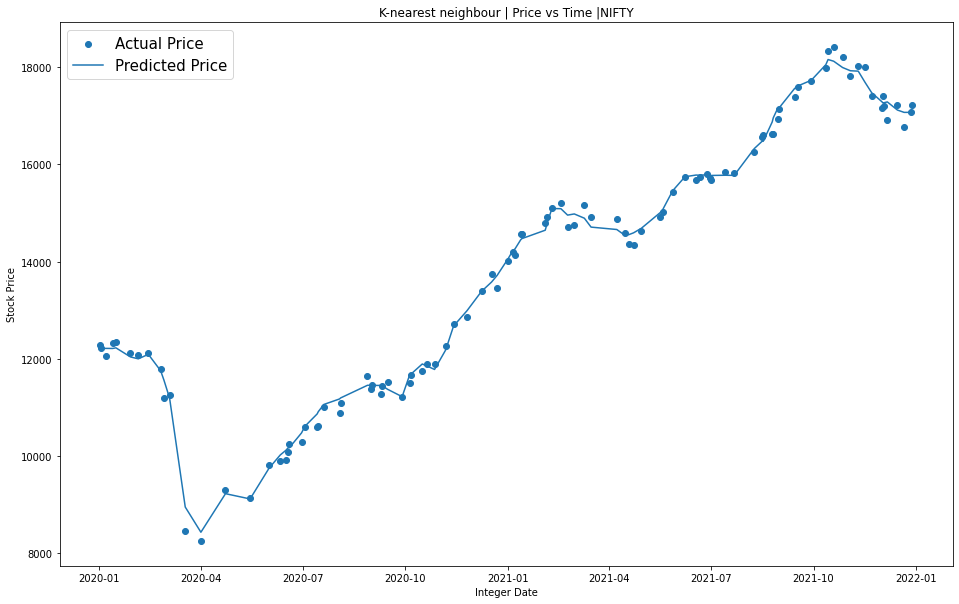

In [171]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('K-nearest neighbour | Price vs Time | NIFTY')
#plt.plot(train ['Date'],train['Nifty_Close'])
plt.scatter(test['Date'], test['Nifty_Close'], label = 'Actual Price')
plt.plot(test['Date'],test['Predictions'], label ='Predicted Price')
#plt.plot(test['Date'],y_pred_NIFTY)
#plt.scatter(x_train,y_train_NIFTY, edgecolor='w', label='Actual Price')
#plt.scatter(x_train, model.predict(x_train_K), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend(loc=2, prop={'size': 15} )
plt.show()

In [174]:
##BSE
#Validating model
model.fit(x_train_K,y_train_BSE)
y_pred_BSE= model.predict(x_test_K)

test['Predictions_BSE'] = 0
test['Predictions_BSE'] = y_pred_BSE

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_BSE, y_pred_BSE))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_BSE, y_pred_BSE))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_BSE, y_pred_BSE)))
print('R2: ', metrics.r2_score(y_test_BSE, y_pred_BSE))


Mean Absolute Error: 422.2911999999995
Mean Squared Error: 289599.2000366417
Root Mean Squared Error: 538.1442186223334
R2:  0.996286725604948


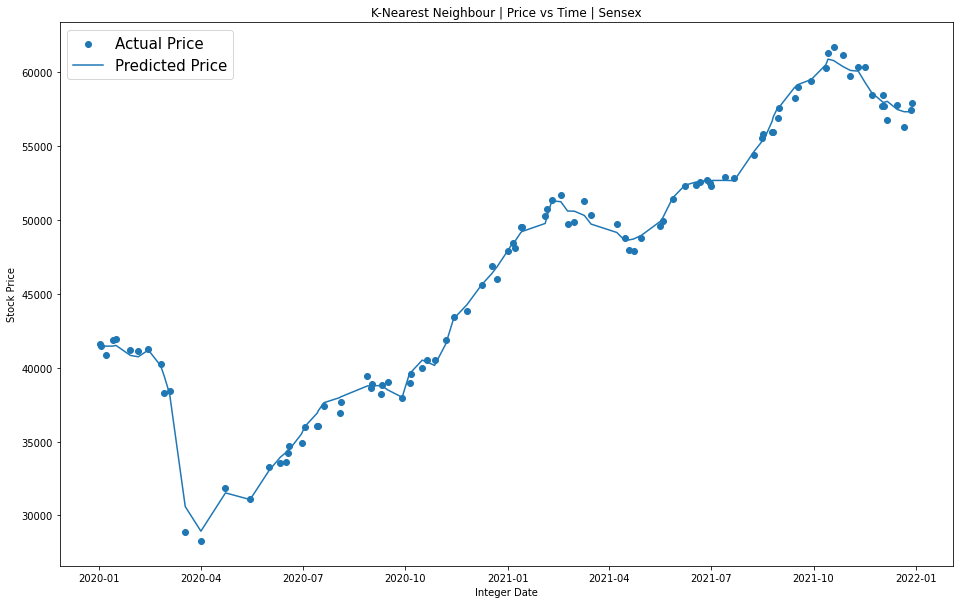

In [175]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('K-Nearest Neighbour | Price vs Time | Sensex')
plt.scatter(test['Date'], test['Sensex_Close'], label = 'Actual Price')
plt.plot(test['Date'],test['Predictions_BSE'], label ='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend(loc=2, prop={'size': 15} )
plt.show()

# Auto ARIMA

In [267]:
df['Date'] = pd.to_datetime(df.Date)
df.index = df['Date']

data = df.sort_index(ascending=True, axis =0)

train = data[:399]
test = data[399:]

training = train['Nifty_Close']
validation = test['Nifty_Close']

model = auto_arima(training,start_p=2, start_q=1,max_p=2, max_q=1, m=12,
                   start_P=2, seasonal=True,d=1, D=1, trace=True,
                   error_action='ignore',suppress_warnings=True)
model.fit(training)



Performing stepwise search to minimize aic
 ARIMA(2,1,1)(2,1,1)[12]             : AIC=inf, Time=7.11 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5333.395, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5263.733, Time=0.45 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.86 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5335.059, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5218.948, Time=0.94 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.33 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.45 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5217.778, Time=0.85 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5262.150, Time=0.48 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=3.46 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.08 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5218.973, Time=1.06 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=6.29 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=5219.770, T

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [268]:
forecast = model.predict(n_periods = len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])
print (forecast)

print('Mean Absolute Error:', metrics.mean_absolute_error(test['Nifty_Close'], forecast['Prediction']))  
print('Mean Squared Error:', metrics.mean_squared_error(test['Nifty_Close'], forecast['Prediction']))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test['Nifty_Close'], forecast['Prediction'])))
print('R2: ', metrics.r2_score(test['Nifty_Close'], forecast['Prediction']))


              Prediction
Date                    
2021-08-09  16323.796969
2021-08-10  16331.762213
2021-08-11  16352.340791
2021-08-12  16292.101023
2021-08-13  16238.743367
...                  ...
2021-12-27  18450.160944
2021-12-28  18572.224482
2021-12-29  18583.190815
2021-12-30  18595.263532
2021-12-31  18513.757857

[100 rows x 1 columns]
Mean Absolute Error: 660.4316793880498
Mean Squared Error: 593337.8975263886
Root Mean Squared Error: 770.284296559646
R2:  -1.0394393916348932


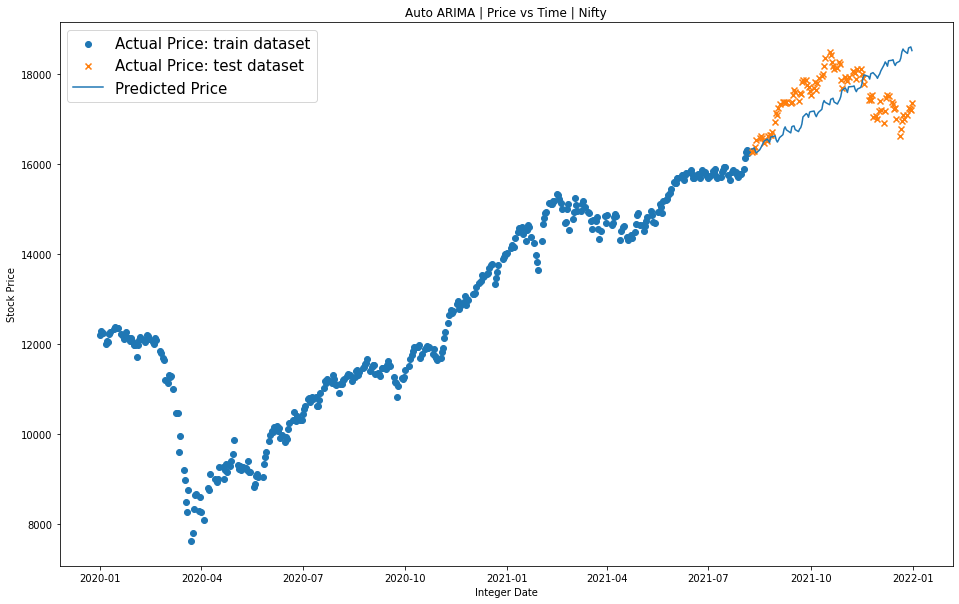

In [278]:
plt.figure(1, figsize=(16,10))
plt.title('Auto ARIMA | Price vs Time | Nifty')
plt.scatter(train['Date'],train['Nifty_Close'], label = 'Actual Price: train dataset')
plt.scatter(test['Date'],test['Nifty_Close'], marker = 'x', label = 'Actual Price: test dataset')
plt.plot(test['Date'],forecast['Prediction'], label = 'Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend(loc=2, prop={'size': 15} )
plt.show()

In [279]:
training_BSE = train['Sensex_Close']
validation_BSE= test['Sensex_Close']

model = auto_arima(training_BSE,start_p=2, start_q=1,max_p=2, max_q=1, m=12,
                   start_P=2, seasonal=True,d=1, D=1, trace=True,
                   error_action='ignore',suppress_warnings=True)
model.fit(training_BSE)

Performing stepwise search to minimize aic
 ARIMA(2,1,1)(2,1,1)[12]             : AIC=inf, Time=8.18 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6293.618, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6253.132, Time=0.41 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=6228.170, Time=0.68 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=6294.735, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=1.94 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=6199.976, Time=2.21 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=5.50 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=6198.395, Time=2.45 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=6226.335, Time=0.25 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=2.18 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.95 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=6199.958, Time=1.95 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=6.31 sec
 ARIMA(0,1,0)(0,1,2)[12] intercept   : AIC=6200.3

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [280]:
forecast = model.predict(n_periods = len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])
print (forecast)

print('Mean Absolute Error:', metrics.mean_absolute_error(test['Sensex_Close'], forecast['Prediction']))  
print('Mean Squared Error:', metrics.mean_squared_error(test['Sensex_Close'], forecast['Prediction']))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test['Sensex_Close'], forecast['Prediction'])))
print('R2: ', metrics.r2_score(test['Sensex_Close'], forecast['Prediction']))

              Prediction
Date                    
2021-08-09  54570.662104
2021-08-10  54762.930519
2021-08-11  54851.970358
2021-08-12  54582.477290
2021-08-13  54531.535319
...                  ...
2021-12-27  61389.483481
2021-12-28  61570.827865
2021-12-29  61759.964311
2021-12-30  61944.530440
2021-12-31  61639.881196

[100 rows x 1 columns]
Mean Absolute Error: 2006.4871093952572
Mean Squared Error: 5432891.599441415
Root Mean Squared Error: 2330.8564090139516
R2:  -0.7088926860493487


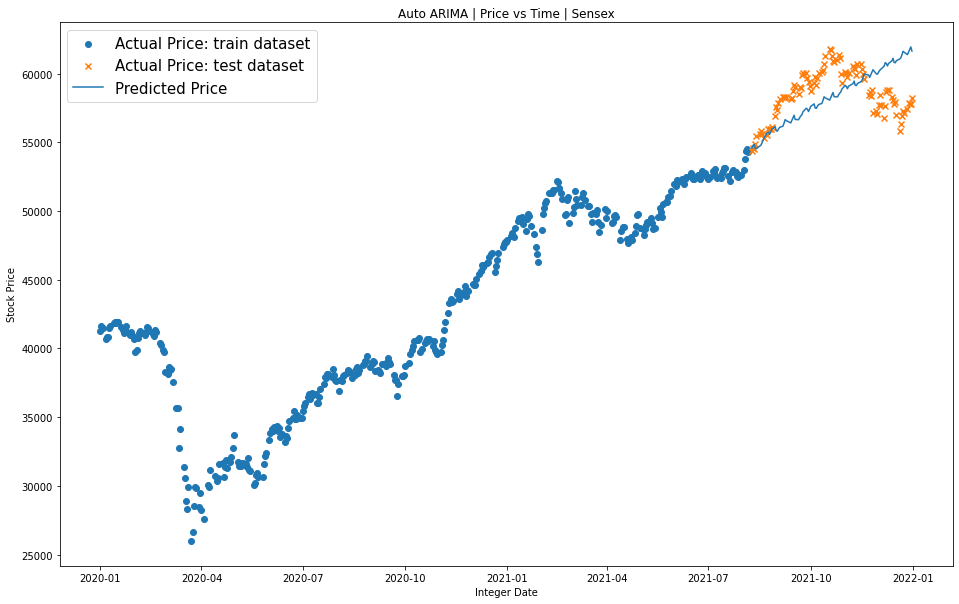

In [281]:
plt.figure(1, figsize=(16,10))
plt.title('Auto ARIMA | Price vs Time | Sensex')
plt.scatter(train['Date'],train['Sensex_Close'], label = 'Actual Price: train dataset')
plt.scatter(test['Date'],test['Sensex_Close'], marker = 'x', label = 'Actual Price: test dataset')
plt.plot(test['Date'],forecast['Prediction'], label = 'Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend(loc=2, prop={'size': 15} )
plt.show()

In [287]:
# Creating simple moving average using 10days time window
df['SMA_10_Nifty'] = df['Nifty_Close'].rolling(window=10).mean()
df['SMA_10_Sensex'] = df['Sensex_Close'].rolling(window=10).mean()
df = df.dropna()
df = df.reset_index(drop=True)

print('Mean Absolute Error nifty:', metrics.mean_absolute_error(df['Nifty_Close'], df['SMA_10_Nifty']))  
print('Mean Squared Error nifty:', metrics.mean_squared_error(df['Nifty_Close'], df['SMA_10_Nifty']))
print('Root Mean Squared nifty:', np.sqrt(metrics.mean_squared_error(df['Nifty_Close'], df['SMA_10_Nifty'])))
print('R2 nifty: ', metrics.r2_score(df['Nifty_Close'], df['SMA_10_Nifty']))

print('Mean Absolute Error sensex:', metrics.mean_absolute_error(df['Sensex_Close'], df['SMA_10_Sensex']))  
print('Mean Squared Error sensex:', metrics.mean_squared_error(df['Sensex_Close'], df['SMA_10_Sensex']))
print('Root Mean Squared sensex:', np.sqrt(metrics.mean_squared_error(df['Sensex_Close'], df['SMA_10_Sensex'])))
print('R2 sensex: ', metrics.r2_score(df['Sensex_Close'], df['SMA_10_Sensex']))

Mean Absolute Error nifty: 219.18019926777538
Mean Squared Error nifty: 93998.29931782595
Root Mean Squared nifty: 306.5914208157592
R2 nifty:  0.9881950390117817
Mean Absolute Error sensex: 748.7487713097717
Mean Squared Error sensex: 1096720.757326094
Root Mean Squared sensex: 1047.2443637117815
R2 sensex:  0.9871871558763831


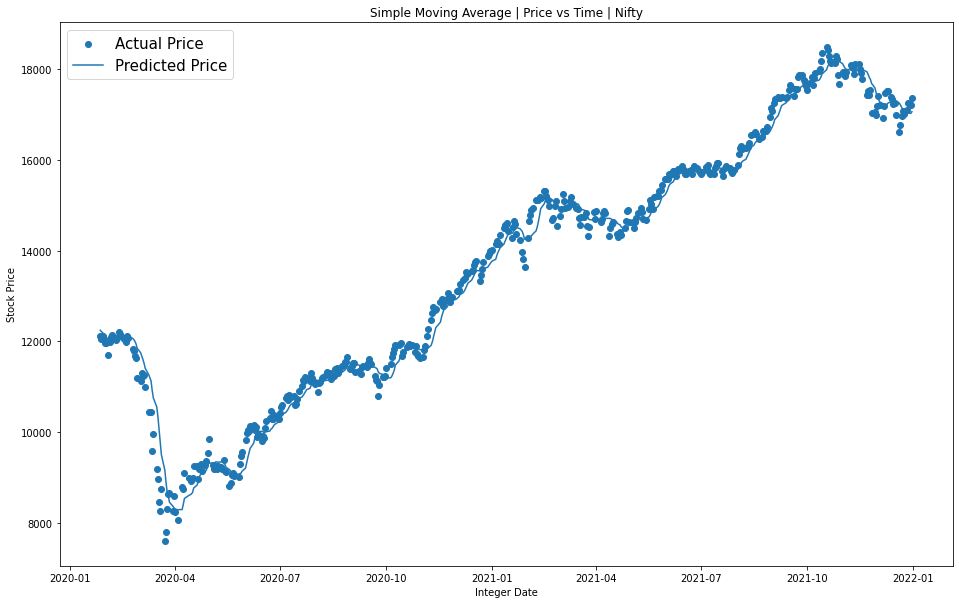

In [289]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Simple Moving Average | Price vs Time | Nifty')
plt.scatter(df['Date'], df['Nifty_Close'], label = 'Actual Price')
plt.plot(df['Date'],df['SMA_10_Nifty'], label ='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend(loc=2, prop={'size': 15} )
plt.show()



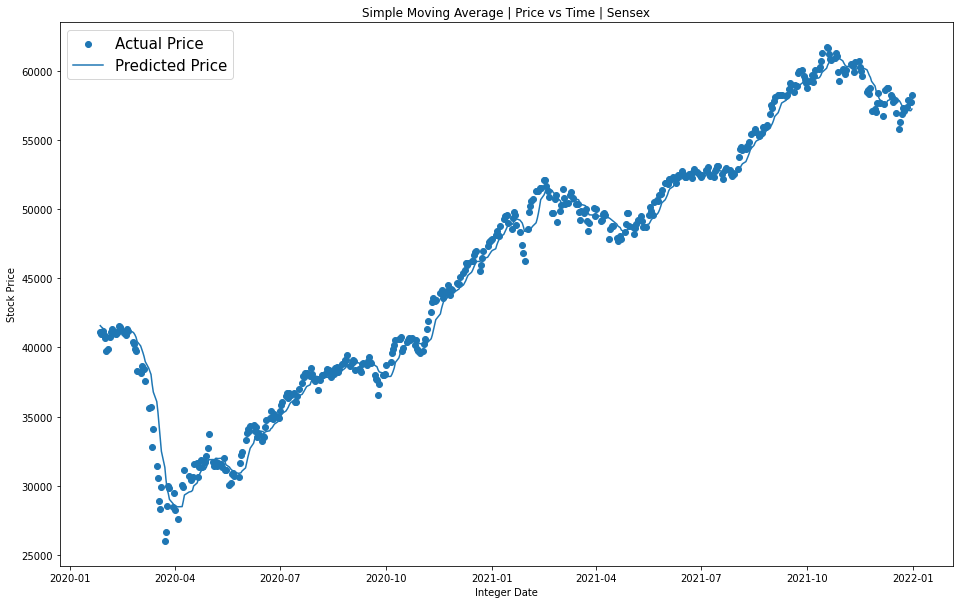

In [290]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Simple Moving Average | Price vs Time | Sensex')
plt.scatter(df['Date'], df['Sensex_Close'], label = 'Actual Price')
plt.plot(df['Date'],df['SMA_10_Sensex'], label ='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend(loc=2, prop={'size': 15} )
plt.show()

